## Problem from https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
from scipy.stats import norm

In [2]:
data_train=pd.read_csv("data/Train.csv")
data_test=pd.read_csv("data/Test.csv")

In [3]:
data_train.shape

(18288, 3)

In [4]:
all_data=data_train.append(data_test)
all_data.shape

(23400, 3)

In [5]:
all_data.describe()

,Count,ID
count,18288.000000,23400.000000
mean,138.958115,11699.500000
std,153.467461,6755.142486
min,2.000000,0.000000
25%,22.000000,5849.750000
50%,84.000000,11699.500000
75%,210.000000,17549.250000
max,1244.000000,23399.000000


In [6]:
all_data.columns[all_data.isnull().any()]

Index([u'Count'], dtype='object')

In [7]:
all_data.head()

,Count,Datetime,ID
0,8.0,25-08-2012 00:00,0
1,2.0,25-08-2012 01:00,1
2,6.0,25-08-2012 02:00,2
3,2.0,25-08-2012 03:00,3
4,2.0,25-08-2012 04:00,4


In [8]:
import datetime

for x in all_data['Datetime']:
    print (datetime.date(int(x[6:10]), int(x[3:5]), int(x[0:2]) ).strftime('%A')) 
    print (datetime.date(int(x[6:10]), int(x[3:5]), int(x[0:2]) ).strftime('%U')) 

Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Saturday
34
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Sunday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Monday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
Tuesday
35
T

Sunday
42
Sunday
42
Sunday
42
Sunday
42
Sunday
42
Sunday
42
Sunday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Monday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Tuesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Wednesday
42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Thursd

48
Sunday
48
Sunday
48
Sunday
48
Sunday
48
Sunday
48
Sunday
48
Sunday
48
Sunday
48
Sunday
48
Sunday
48
Sunday
48
Sunday
48
Sunday
48
Sunday
48
Sunday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Monday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Tuesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Wednesday
48
Thursday
48
Thursday
48
Thursda

Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Sunday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Monday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Tuesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday
01
Wednesday

06
Saturday
06
Saturday
06
Saturday
06
Saturday
06
Saturday
06
Saturday
06
Saturday
06
Saturday
06
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Sunday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Monday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Tuesday
07
Wednesday
07
Wednesday
07
Wednesday
07
Wednesday
07
Wednesday
07
Wednesday
07
Wednesday
07
Wednesday
07
Wednesday
07
Wednesday
07
Wednesday
07
Wednesday
07
W

Saturday
12
Saturday
12
Saturday
12
Saturday
12
Saturday
12
Saturday
12
Saturday
12
Saturday
12
Saturday
12
Saturday
12
Saturday
12
Saturday
12
Saturday
12
Saturday
12
Saturday
12
Saturday
12
Saturday
12
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Sunday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Monday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Tuesday
13
Wednesday
13
Wednesday
13
Wednesday
13
Wednesday
13


18
Friday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Saturday
18
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Sunday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Monday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19
Tuesday
19

Friday
24
Friday
24
Friday
24
Friday
24
Friday
24
Friday
24
Friday
24
Friday
24
Friday
24
Friday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Saturday
24
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Sunday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Monday
25
Tuesday
25
Tuesday
25
Tuesday
25
Tuesday
25
Tuesday
25
Tuesday
25
Tuesday
25
Tuesday
25
Tuesday
25
Tuesday
25
Tuesday
25
Tuesday
25


30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Friday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Saturday
30
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Sunday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Monday
31
Tuesday
31
Tuesday
31
Tuesday
31
Tuesday
31
Tuesd

Thursday
36
Thursday
36
Thursday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Friday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Saturday
36
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Sunday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday
37
Monday

42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Thursday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Friday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Saturday
42
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Sunday
43
Monday
43
Monday
43
Monday
43
Monday
43
Monday
43
Monday
43
Monday
43
Monday
43
Monday
43
Monday


Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Thursday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Friday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Saturday
48
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Sunday
49
Su

02
Wednesday
02
Wednesday
02
Wednesday
02
Wednesday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Thursday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Friday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Saturday
02
Sunday
03
Sunday
03
Sunday
03
Sunday
03
Sunday
03
Sunday
03
Sunday
03
Sunday
03
Sunday
03
Sunday
03
Sunday
03
Sunday
03
Sunday
03

Wednesday
08
Wednesday
08
Wednesday
08
Wednesday
08
Wednesday
08
Wednesday
08
Wednesday
08
Wednesday
08
Wednesday
08
Wednesday
08
Wednesday
08
Wednesday
08
Wednesday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Thursday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Friday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Saturday
08
Sunday
09
Sunda

14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Wednesday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Thursday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Friday
14
Saturday
14
Saturday
14
Saturday
14
Saturday
14
Saturday
14
Saturday
14
Saturday
14
Saturday
14
Saturday
14
Saturday
14
Saturday
14
Saturday
14
Saturday
14
Saturday
14
Saturday
14
Saturday
14
Satu

Tuesday
20
Tuesday
20
Tuesday
20
Tuesday
20
Tuesday
20
Tuesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Wednesday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Thursday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Friday
20
Saturday
20
Saturday
20
Saturday
20
Saturday
20
Saturday
20
Saturday
20
Saturday
20
Saturday
2

26
Tuesday
26
Tuesday
26
Tuesday
26
Tuesday
26
Tuesday
26
Tuesday
26
Tuesday
26
Tuesday
26
Tuesday
26
Tuesday
26
Tuesday
26
Tuesday
26
Tuesday
26
Tuesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Wednesday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Thursday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Friday
26
Sat

Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Tuesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Wednesday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Thursday
32
Friday
32
Friday
32
Friday
32
Friday
32
Friday
32
Friday
32
Friday
32
Friday
32
Friday
32
Friday
32
Friday
32
Friday
32
Friday
32
Friday
32
Friday


38
Monday
38
Monday
38
Monday
38
Monday
38
Monday
38
Monday
38
Monday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Tuesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Wednesday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Thursday
38
Friday
38
Friday
38
Friday
38
Friday
38
Friday
38
Friday
38
Fri

Monday
44
Monday
44
Monday
44
Monday
44
Monday
44
Monday
44
Monday
44
Monday
44
Monday
44
Monday
44
Monday
44
Monday
44
Monday
44
Monday
44
Monday
44
Monday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Tuesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Wednesday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44
Thursday
44


50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Monday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Tuesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Wednesday
50
Thursday
50
Thursday
50
Thursday
50
Thursday
50
Thursday
50
Thursday
50
Thursday
50
Thursday
50
Thursday
50
Thursday
50
Thursday
50
Thursday
50
Thursday
50
Thursday
50
Thursday
50
T

Sunday
04
Sunday
04
Sunday
04
Sunday
04
Sunday
04
Sunday
04
Sunday
04
Sunday
04
Sunday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Monday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Tuesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Wednesday
04
Thursday
04
Thursday
04
Thursday
04
Thursday
04
Thursday
04
Thursday
04
Thursday
04
Thursday
0

10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Sunday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Monday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Tuesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Wednesday
10
Thursday
10

Saturday
15
Saturday
15
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Sunday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Monday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Tuesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
16
Wednesday
1

In [9]:
all_data['month'] = [int(x[3:5]) for x in all_data['Datetime']]
all_data['year'] = [int(x[6:10]) for x in all_data['Datetime']]
all_data['time'] = [x[11:] for x in all_data['Datetime']]
all_data['week_number']=[datetime.date(int(x[6:10]), int(x[3:5]), int(x[0:2]) ).strftime('%U') for x in all_data['Datetime']]
all_data['day']=[datetime.date(int(x[6:10]), int(x[3:5]), int(x[0:2]) ).strftime('%A') for x in all_data['Datetime']]

In [10]:
all_data.loc[all_data['day']=="Saturday",'weekend'] = 1
all_data.loc[all_data['day']=="Friday",'weekend'] = 1
all_data.loc[all_data['day']=="Sunday",'weekend'] = 1

In [11]:
all_data.loc[all_data['weekend']!=1,'weekend'] = 0

In [12]:
all_data['weekend'].value_counts()

0.0    13344
1.0    10056
Name: weekend, dtype: int64

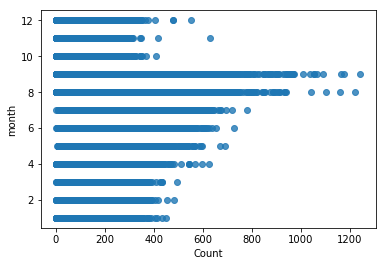

In [13]:
sns.regplot(all_data['Count'], all_data['month'], fit_reg=False)

In [14]:
all_data['time'] = [x[11:13] for x in all_data['Datetime']]

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def factorize(data, var, fill_na = None):
      if fill_na is not None:
            data[var].fillna(fill_na, inplace=True)
      le.fit(data[var])
      data[var] = le.transform(data[var])
      return data

In [16]:
all_data=factorize(all_data, "day")

In [17]:
all_data

,Count,Datetime,ID,month,year,time,week_number,day,weekend
0,8.0,25-08-2012 00:00,0,8,2012,00,34,2,1.0
1,2.0,25-08-2012 01:00,1,8,2012,01,34,2,1.0
2,6.0,25-08-2012 02:00,2,8,2012,02,34,2,1.0
3,2.0,25-08-2012 03:00,3,8,2012,03,34,2,1.0
4,2.0,25-08-2012 04:00,4,8,2012,04,34,2,1.0
5,2.0,25-08-2012 05:00,5,8,2012,05,34,2,1.0
6,2.0,25-08-2012 06:00,6,8,2012,06,34,2,1.0
7,2.0,25-08-2012 07:00,7,8,2012,07,34,2,1.0
8,6.0,25-08-2012 08:00,8,8,2012,08,34,2,1.0
9,2.0,25-08-2012 09:00,9,8,2012,09,34,2,1.0


In [18]:
del all_data['Datetime']

In [19]:
y_train=all_data['Count']
y_train=pd.DataFrame(y_train).iloc[:18288, :]


In [20]:
all_data

,Count,ID,month,year,time,week_number,day,weekend
0,8.0,0,8,2012,00,34,2,1.0
1,2.0,1,8,2012,01,34,2,1.0
2,6.0,2,8,2012,02,34,2,1.0
3,2.0,3,8,2012,03,34,2,1.0
4,2.0,4,8,2012,04,34,2,1.0
5,2.0,5,8,2012,05,34,2,1.0
6,2.0,6,8,2012,06,34,2,1.0
7,2.0,7,8,2012,07,34,2,1.0
8,6.0,8,8,2012,08,34,2,1.0
9,2.0,9,8,2012,09,34,2,1.0


In [21]:
all_data[['time']] = all_data[['time']].apply(pd.to_numeric)
all_data['peak']=0

In [22]:
all_data.loc[(all_data["time"]>=0) & (all_data["time"]<=6) , 'peak'] = 0
all_data.loc[(all_data["time"]>=7) & (all_data["time"]<=11) , 'peak'] = 1
all_data.loc[(all_data["time"]>=12) & (all_data["time"]<=15) , 'peak'] = 0
all_data.loc[(all_data["time"]>=16) & (all_data["time"]<=21) , 'peak'] = 1
all_data.loc[(all_data["time"]>=22) & (all_data["time"]<=23) , 'peak'] = 0

In [24]:
all_data

,month,year,time,week_number,day,weekend,peak
0,8,2012,0,34,2,1.0,0
1,8,2012,1,34,2,1.0,0
2,8,2012,2,34,2,1.0,0
3,8,2012,3,34,2,1.0,0
4,8,2012,4,34,2,1.0,0
5,8,2012,5,34,2,1.0,0
6,8,2012,6,34,2,1.0,0
7,8,2012,7,34,2,1.0,1
8,8,2012,8,34,2,1.0,1
9,8,2012,9,34,2,1.0,1


In [23]:
del all_data['Count']
del all_data['ID']

In [25]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

all_data = pd.DataFrame(min_max_scaler.fit_transform(all_data))


In [26]:
all_data

,0,1,2,3,4,5,6
0,0.636364,0.0,0.000000,0.641509,0.333333,1.0,0.0
1,0.636364,0.0,0.043478,0.641509,0.333333,1.0,0.0
2,0.636364,0.0,0.086957,0.641509,0.333333,1.0,0.0
3,0.636364,0.0,0.130435,0.641509,0.333333,1.0,0.0
4,0.636364,0.0,0.173913,0.641509,0.333333,1.0,0.0
5,0.636364,0.0,0.217391,0.641509,0.333333,1.0,0.0
6,0.636364,0.0,0.260870,0.641509,0.333333,1.0,0.0
7,0.636364,0.0,0.304348,0.641509,0.333333,1.0,1.0
8,0.636364,0.0,0.347826,0.641509,0.333333,1.0,1.0
9,0.636364,0.0,0.391304,0.641509,0.333333,1.0,1.0


In [27]:

data_train_set=all_data.iloc[:18288, :]
data_test_set=all_data.iloc[18288:, :]

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(data_train_set, y_train)
y_pred=lr.predict(data_test_set)

In [ ]:
#from sklearn.linear_model import Lasso
#lr=Lasso()
#lr.fit(data_train_set, y_train)
#y_pred=lr.predict(data_test_set)

In [29]:
y_pred

array([[ 289.00615205],
       [ 293.44026932],
       [ 297.87438658],
       ..., 
       [ 473.67387481],
       [ 476.45773906],
       [ 480.89185633]])

In [33]:
y_pred=pd.DataFrame(y_pred)
writer = pd.ExcelWriter('jetrail_forecast.xlsx')
y_pred.to_excel(writer,'Sheet1')
writer.save()

In [31]:
from sklearn.linear_model import Ridge
poly = Ridge(alpha=1)
poly.fit(data_train_set, y_train)
y_pred=poly.predict(data_test_set)
y_pred=pd.DataFrame(y_pred)
writer = pd.ExcelWriter('jetrail_forecast_poly.xlsx')
y_pred.to_excel(writer,'Sheet1')
writer.save()